## Observations and Insights 

Analysis
   From the analysis ran on mice at Pymaceuticals Inc, 249 mice were tested against 9 different drugs:(Capomulin    Ceftamin,Infubinol,Ketapril,Naftisol,Propriva,Ramicane,Stelasyn,Zoniferol) and a placebo. According to the data, there were slightly more male mice (958) tested than female mice(930). According to the data, it can be said that the drug Ramicane was the most effective drug in reducing tumor growth. Ramicane had the lowest mean, median, variance, and standard deviation.    

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df= pd.merge(mouse_metadata, study_results, on= "Mouse ID")
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique_mice= merged_df["Mouse ID"].unique()
unique_mice

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [3]:
#Check the number of mice
len(unique_mice)

249

In [4]:
# Count of dataframe
merged_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_duplicate= merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"])]

In [6]:
mouse_duplicate.sum()

Mouse ID                                  g989g989g989g989g989
Drug Regimen          ProprivaProprivaProprivaProprivaPropriva
Sex                             FemaleFemaleFemaleFemaleFemale
Age_months                                                 105
Weight (g)                                                 130
Timepoint                                                   50
Tumor Volume (mm3)                                   250.55059
Metastatic Sites                                             1
dtype: object

In [7]:
# True are equivalent to duplicate values for Mouse ID and Timepoint
mouse_duplicate.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 



In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= merged_df.drop_duplicates(subset= ["Mouse ID", "Timepoint"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#grouped_regimen= clean_df.groupby["Drug Regimen"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [12]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

#Create groupby to group drug regimen
grouped_regimen= clean_df.groupby(["Drug Regimen"])


In [13]:
# Calculate mean of groupby drug regimen from tumor volume
tumor_volume_mean= grouped_regimen["Tumor Volume (mm3)"].mean()
tumor_volume_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Caculate median of drug groupby from tumor volume
tumor_volume_median= grouped_regimen["Tumor Volume (mm3)"].median()
tumor_volume_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Calculate variance of groupby drug regimen from tumor volume
tumor_volume_variance= grouped_regimen["Tumor Volume (mm3)"].var()
tumor_volume_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Calculate standard deviation of groupby drug regimen from tumor volume
tumor_volume_std= grouped_regimen["Tumor Volume (mm3)"].std()
tumor_volume_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [17]:
#Calculate sem
tumor_volume_se= grouped_regimen["Tumor Volume (mm3)"].sem()
tumor_volume_se

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# Assemble the resulting series into a single summary dataframe
tumor_df= pd.DataFrame({
    "Mean": tumor_volume_mean,
    "Median": tumor_volume_median,
    "Variance": tumor_volume_variance,
    "Standard Deviation": tumor_volume_std,
    "SEM": tumor_volume_se   
})
tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df=grouped_regimen["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
dr= clean_df["Drug Regimen"].unique()
dr

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

Text(0, 0.5, ' Number of Mice')

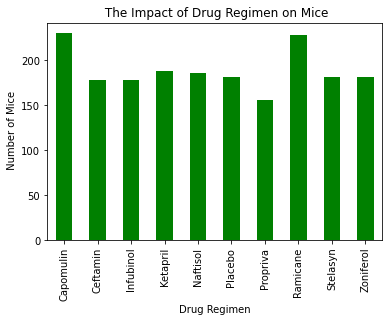

In [21]:
drug_regimen_summary= grouped_regimen["Mouse ID"].count()
drug_plot= drug_regimen_summary.plot.bar(color= "green", title = " The Impact of Drug Regimen on Mice" )
drug_plot.set_xlabel("Drug Regimen")
drug_plot.set_ylabel(" Number of Mice")

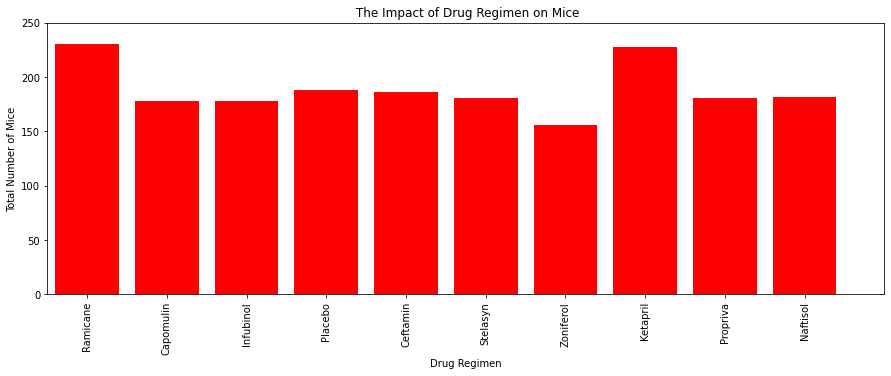

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis=np.arange(len(dr))
y_axis=drug_regimen_summary

#Add tick locations for x_axis
tick_location= [x for x in x_axis]

#Set figure and create bar graph
plt.figure(figsize=(15,5))
plt.bar(x_axis,y_axis, color="red")
plt.xticks(tick_location,dr, rotation= "vertical")
plt.title(" The Impact of Drug Regimen on Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")

plt.xlim(-0.5,len(x_axis))
plt.ylim(0,250)
plt.show()

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
g_mice= clean_df.groupby(["Sex"]).count()
g_mice

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,930,930,930,930,930,930,930
Male,958,958,958,958,958,958,958


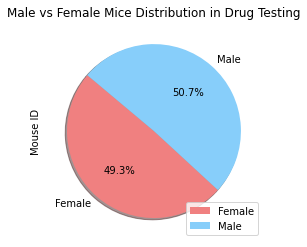

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_pie= g_mice.plot(kind= "pie",y= "Mouse ID",title= ("Male vs Female Mice Distribution in Drug Testing"), colors= ["lightcoral", "lightskyblue"],
autopct="%1.1f%%",shadow=True, startangle=140) 
mice_pie.legend(loc= "lower right")
plt.show()


In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_mice= clean_df["Sex"]
gender_mice.value_counts()

labels=["Male", "Female"]
sizes= gender_mice.value_counts()
colors =["lightskyblue", "lightcoral"]


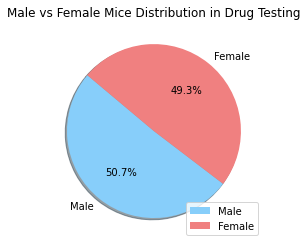

In [26]:
 #Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%",shadow=True, startangle=140)
plt.title("Male vs Female Mice Distribution in Drug Testing")
plt.legend(loc="lower right")
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint= clean_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [28]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_df= pd.merge(last_timepoint, clean_df, on= (["Mouse ID", "Timepoint"]))
timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list= [ "Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data= []



In [30]:
# Locate the rows which contain mice on each drug and get the tumor volumes create for loop
for treatment in treatment_list:
    tx_regimen= timepoint_df.loc[timepoint_df["Drug Regimen"]== treatment]
    tumor_vol= tx_regimen["Tumor Volume (mm3)"]

# Append list
    tumor_vol_data.append(tumor_vol)

In [31]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. Calculate Quartiles
#Quartile for Capomulin
quartiles = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq  

#Ramicane
quartiles1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1  

#Infubinol
quartiles2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2  

#Ceftamin
quartiles3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3 

print(f"The lower quartile of {treatment_list[0]} is: {lowerq}")
print(f"The upper quartile of {treatment_list[0]} is: {upperq}")
print(f"The interquartile range of {treatment_list[0]}is: {iqr}")




The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulinis: 7.781863460000004


In [32]:
print(f"The lower quartile of {treatment_list[1]} is: {lowerq1}")
print(f"The upper quartile of {treatment_list[1]} is: {upperq1}")
print(f"The interquartile range of {treatment_list[1]}is: {iqr1}")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicaneis: 9.098536719999998


In [33]:
print(f"The lower quartile of {treatment_list[2]} is: {lowerq2}")
print(f"The upper quartile of {treatment_list[2]} is: {upperq2}")
print(f"The interquartile range of {treatment_list[2]}is: {iqr2}")


The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinolis: 11.477135160000003


In [34]:
print(f"The lower quartile of {treatment_list[3]} is: {lowerq3}")
print(f"The upper quartile of {treatment_list[3]} is: {upperq3}")
print(f"The interquartile range of {treatment_list[3]}is: {iqr3}")


The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftaminis: 15.577752179999997


In [35]:
#Upper and lower bounds for each treatment to determine outliers
upper_bound= upperq+ (1.5*iqr)
lower_bound= lowerq-(1.5*iqr)

upper_bound1= upperq1+ (1.5*iqr1)
lower_bound1= lowerq1-(1.5*iqr1)

upper_bound2= upperq2+ (1.5*iqr2)
lower_bound2= lowerq2-(1.5*iqr2)

upper_bound3= upperq3+ (1.5*iqr3)
lower_bound3= lowerq3-(1.5*iqr3)

print(f" {treatment_list[0]} values below {lower_bound} and above {upper_bound} could possibly be outliers")
print(f" {treatment_list[1]} values below {lower_bound1} and above {upper_bound1} could possibly be outliers")
print(f" {treatment_list[2]} values below {lower_bound2} and above {upper_bound2} could possibly be outliers")
print(f" {treatment_list[3]} values below {lower_bound3} and above {upper_bound3} could possibly be outliers")


 Capomulin values below 20.70456164999999 and above 51.83201549 could possibly be outliers
 Ramicane values below 17.912664470000003 and above 54.30681135 could possibly be outliers
 Infubinol values below 36.83290494999999 and above 82.74144559000001 could possibly be outliers
 Ceftamin values below 25.355449580000002 and above 87.66645829999999 could possibly be outliers


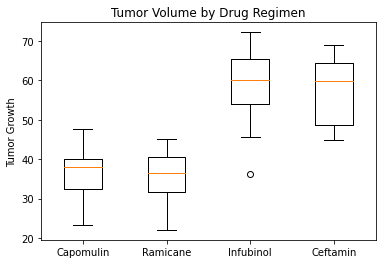

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Growth')
ax1.boxplot(tumor_vol_data, labels=treatment_list)
plt.show()

## Line and Scatter Plots

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#use .loc to locate mice treated with Capomulin
cp_mice = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
cp_mice.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

In [38]:
# Choose a mouse treated with Capomulin to create line plot of tumor volume vs time point
mouse_s185= clean_df.loc[clean_df["Mouse ID"]=="s185"]

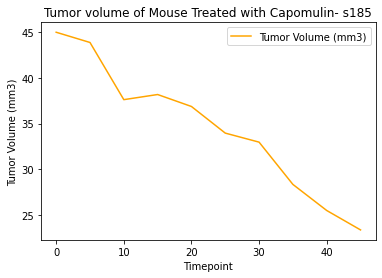

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis= mouse_s185["Timepoint"]
y_axis= mouse_s185["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, color= "orange", label= "Tumor Volume (mm3)")
plt.title("Tumor volume of Mouse Treated with Capomulin- s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()
plt.show()

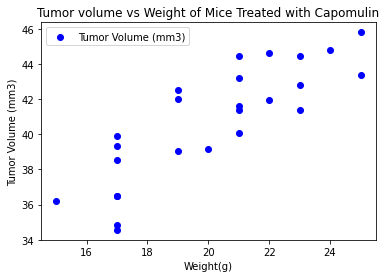

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cp_group= cp_mice.groupby(["Mouse ID"]).mean()

#Average Tumor Means
x_axis= cp_group["Weight (g)"]
y_axis= cp_group["Tumor Volume (mm3)"]
 
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", label= "Tumor Volume (mm3)")
plt.title("Tumor volume vs Weight of Mice Treated with Capomulin")
plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()
plt.show()

## Correlation and Regression

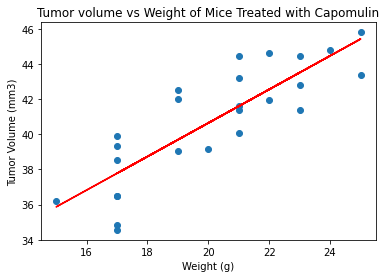

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cp_group["Weight (g)"]
y_values = cp_group["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor volume vs Weight of Mice Treated with Capomulin")
plt.show()

#correlation = st.pearsonr(x_axis,y_axis)
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regress_values = x_axis * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_axis,y_axis)
#plt.plot(x_axis,regress_values,"r-")